In [1]:
from PyPESTO.FRP import create_FRP2_v1
from PyPESTO.COMP.CPE import CopolymerEquations, cpe_model, create_wrapper, cpe_irreversible_model_nll, amici_irreversible_model, amici_irr_acqf, amici_CPE_sim_
import amici
import numpy as np
import matplotlib.pyplot as plt

The tests rely on tellurium to construct the models
Since tellurium is not installed the tests can't be run
If you want to run the tests, pip install tellurium first


In [5]:
create_FRP2_v1.load_amici_from_sbml()

Creating SBML model (FRP2 v1)
Creating species.
Generating parameters.
Creating reactions
Importing AMICI model from SBML
Import model (FRP2_v1) module.


(<amici.amici.ModelPtr; proxy of <Swig Object of type 'std::unique_ptr< amici::Model > *' at 0xffff32e673c0> >,
 '/SBML/PyPESTO/FRP/FRP2_v1/sbml_model.xml')

In [2]:
model_module = amici.import_model_module('FRP2_v1', 'tmp/FRP2_v1')
model = model_module.getModel()


In [3]:
def analyze_data(rdata, X_eval):
    cA = rdata.by_id('A')
    cB = rdata.by_id('B')
    xA = (np.max(cA) - cA) / np.max(cA)
    xB = (np.max(cB) - cB) / np.max(cB)
    x  = (1 - cA - cB)
    
    xA_eval = np.interp(X_eval, x, xA)
    xB_eval = np.interp(X_eval, x, xB)
    t_eval  = np.interp(X_eval, x, rdata.ts)
    
    return t_eval, xA_eval, xB_eval

def plot_conversion(x_eval, xA_eval, xB_eval, ax=None):
    
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(x_eval, xA_eval, 'o-', label='A')
    ax.plot(x_eval, xB_eval, 'o-', label='B')
    # ax.set_xlabel('Time')
    ax.set_ylabel('Conversion')
    ax.legend()
    # ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    return ax

Text(0.5, 0, 'Total Monomer Conversion')

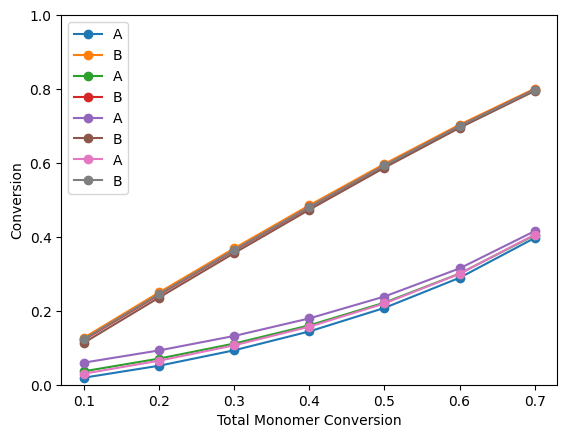

In [32]:
f1 = 0.25
r1 = 4.0
r2 = 10.0
X_eval = np.linspace(0.1, 0.7, 7)


rdata = amici_CPE_sim_(model, X_eval, f1=f1, r1=r1, r2=r2, b1=0, g1=0, b2=0, g2=0, rX=0.1)
t_eval1, xA_eval1, xB_eval1 = analyze_data(rdata, X_eval)

rdata = amici_CPE_sim_(model, X_eval, f1=f1, r1=r1, r2=r2, b1=0, g1=0, b2=0, g2=0, rX=1)
t_eval2, xA_eval2, xB_eval2 = analyze_data(rdata, X_eval)

rdata = amici_CPE_sim_(model, X_eval, f1=f1, r1=r1, r2=r2, b1=0, g1=0, b2=0, g2=0, rX=10)
t_eval3, xA_eval3, xB_eval3 = analyze_data(rdata, X_eval)

inputs = [f1, r1, r2, 0, 0, 0, 0]
copolymer = CopolymerEquations.fromLundberg(inputs)
_, xA_eval4, xB_eval4 = copolymer.solve_izu(X_eval)

fig, ax = plt.subplots()
plot_conversion(X_eval, xA_eval1, xB_eval1, ax=ax)
plot_conversion(X_eval, xA_eval2, xB_eval2, ax=ax)
plot_conversion(X_eval, xA_eval3, xB_eval3, ax=ax)
plot_conversion(X_eval, xA_eval4, xB_eval4, ax=ax)
ax.set_xlabel('Total Monomer Conversion')
# ax.set_xlim(0.1, 0.2)

In [23]:



plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

<Axes: ylabel='Conversion'>

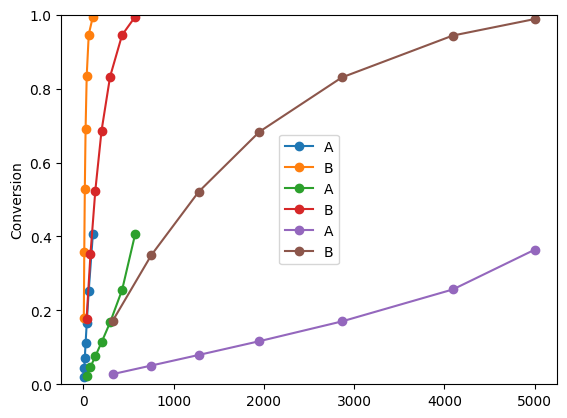

In [19]:
fig, ax = plt.subplots()
plot_conversion(t_eval1, xA_eval1, xB_eval1, ax=ax)
plot_conversion(t_eval2, xA_eval2, xB_eval2, ax=ax)
plot_conversion(t_eval3, xA_eval3, xB_eval3, ax=ax)
# ax.set_xlabel('Total Monomer Conversion')

In [21]:
xB_eval1

array([0.18031077, 0.35681227, 0.52772534, 0.68957728, 0.83507673,
       0.94635159, 0.99448653])

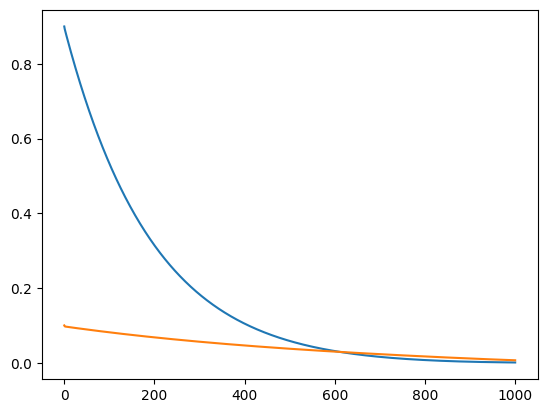

In [35]:
plt.plot(rdata.ts, rdata.by_id('A'))
plt.plot(rdata.ts, rdata.by_id('B'))

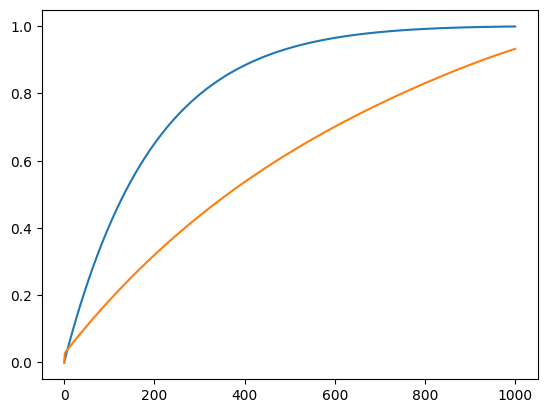

In [36]:
plt.plot(rdata.ts, xA)
plt.plot(rdata.ts, xB)

In [45]:
xA_eval = np.interp(X_eval, x, xA)
xB_eval = np.interp(X_eval, x, xB)
t_eval  = np.interp(X_eval, x, rdata.ts)

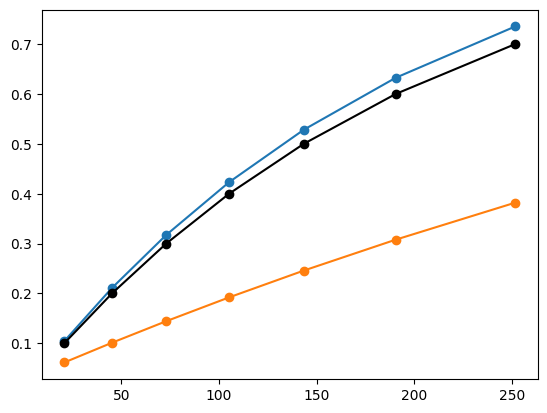

In [46]:
plt.plot(t_eval, xA_eval, 'o-')
plt.plot(t_eval, xB_eval, 'o-')
plt.plot(t_eval, X_eval, 'ko-')

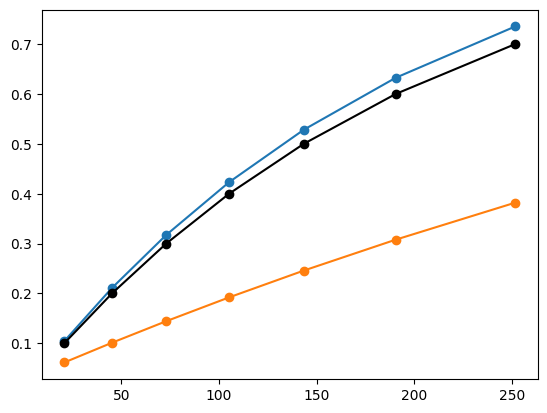

In [42]:
plt.plot(t_eval, xA_eval, 'o-')
plt.plot(t_eval, xB_eval, 'o-')
plt.plot(t_eval, X_eval, 'ko-')